# Groupby - due 10/26 *by Larissa*

---
## Groupby and Arrest Data
---
### Exercise 1

Download the raw California arrest data from the State Attorney General’s office here by scrolling down to the “Arrests” category and downloading the “Arrests - CSV, 5.8 MB” file.

In [228]:
import pandas as pd
df = pd.read_csv('/Users/laroehr/Downloads/OnlineArrestData1980-2020.csv')
df.sample(20)

,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
77836,2012,Female,Other,40 to 69,Del Norte County,0,0,1,0,0,1,15,0
96710,2019,Female,Hispanic,70 and over,San Diego County,1,0,1,0,0,2,12,0
49740,2000,Male,Hispanic,20 to 29,Sonoma County,144,64,176,14,73,471,1400,0
19881,1988,Male,Black,30 to 39,San Benito County,0,0,0,0,0,0,2,0
12842,1985,Female,White,Under 18,Sacramento County,12,102,11,3,7,135,749,338
7504,1983,Female,White,40 to 69,Kings County,0,2,2,0,0,4,70,0
74369,2010,Male,Other,30 to 39,Santa Clara County,126,96,134,11,51,418,658,0
44862,1998,Female,Black,30 to 39,Stanislaus County,18,20,9,1,9,57,59,0
26401,1991,Female,Hispanic,Under 18,Lassen County,0,0,0,0,1,1,1,0
86511,2015,Female,White,70 and over,San Diego County,6,0,1,0,5,12,66,0


---
### Exercise 2

Learning the Group Structure of Your Data
What is the unit of observation for this dataset? In other words, when row zero says that there were 505 arrests for VIOLENT crimes, what exactly is that telling you – 505 arrests in 1980? 505 arrests in Alameda County?

In [229]:
print("There does not seem to be a single unit of observation in this dataset. Each row is one obeservation for a certain year in a particular country in a particular age group for one race. So maybe the combination of year, race, age group and county together are the units of observation")

There does not seem to be a single unit of observation in this dataset. Each row is one obeservation for a certain year in a particular country in a particular age group for one race. So maybe the combination of year, race, age group and county together are the units of observation


---
### Exercise 3
Use duplicated to test if the variables you think uniquely identify rows in your data really do uniquely identify rows. If you were wrong, update your beliefs!

In [230]:
assert not df.duplicated(['COUNTY', 'YEAR', 'RACE', 'GENDER', 'AGE_GROUP']).any()

In [231]:
print("YEAR does not seem to be unique but so are not the other variables on their own. As can be seen, the following variables together uniquely identifieable: County, Race, Year, Gender, and Age group ")

YEAR does not seem to be unique but so are not the other variables on their own. As can be seen, the following variables together uniquely identifieable: County, Race, Year, Gender, and Age group 


---
### Ecercise 4
Once you have a handle on how the data looks now, please collapse the data to be one observation per county-year-racial group.

In [232]:
grouped = df.groupby(['COUNTY', 'RACE','YEAR', 'GENDER', 'AGE_GROUP'], as_index=False)['F_TOTAL'].sum()
grouped
# unsure if violent is the right variable here maybe rather s_total

,COUNTY,RACE,YEAR,GENDER,AGE_GROUP,F_TOTAL
0,Alameda County,Black,1980,Female,18 to 19,100
1,Alameda County,Black,1980,Female,20 to 29,619
2,Alameda County,Black,1980,Female,30 to 39,245
3,Alameda County,Black,1980,Female,40 to 69,73
4,Alameda County,Black,1980,Female,70 and over,1
...,...,...,...,...,...,...
99802,Yuba County,White,2020,Male,20 to 29,92
99803,Yuba County,White,2020,Male,30 to 39,105
99804,Yuba County,White,2020,Male,40 to 69,116
99805,Yuba County,White,2020,Male,70 and over,1


---
### Excercise 5
Given your answer from 3, what groups where you collapsing in question 4?

In [233]:
print('I was collpasing the four variables to unqiuely identify rows: COUNTY, RACE, YEAR, GENDER, AGE_GROUP')

I was collpasing the four variables to unqiuely identify rows: COUNTY, RACE, YEAR, GENDER, AGE_GROUP


---
### Exercise 6

Does the racial composition of arrests in each county vary by arrest type? In other words, do Blacks make up a larger portion of the people arrested for drug offenses than violent offenses? To answer this question, you will need to compute the proportion of all arrests in a county-year that occur within each racial group.

In trying to do this, break the problem down into pieces:

- What two variables do you want in your data you don’t have now to answer this question?

- What two intermediate variables do you need in order to calculate those two final variables?

- How would you get those intermediate variables in your data?

In [234]:
print("I need a variable giving me the ratio of violent arrests based on race and one variable representing the ratio of sexual arrests based on race ")
print("Intermediate I need a variable telling me whether the person is black or not and I need a variable for all ")
print("I will combine those two variables to one variable")

I need a variable giving me the ratio of violent arrests based on race and one variable representing the ratio of sexual arrests based on race 
Intermediate I need a variable telling me whether the person is black or not and I need a variable for all 
I will combine those two variables to one variable


In [235]:
df["Violent Total"] = df.groupby(['COUNTY', 'RACE', 'YEAR'], as_index=False)['VIOLENT'].transform('sum')
df["Violent Percent Black"] = df["VIOLENT"].where(df['RACE']== 'Black') / df["Violent Total"]
df.sample(10)


,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Violent Total,Violent Percent Black
18239,1987,Male,White,Under 18,Sutter County,7,47,1,2,0,57,125,0,96,NaN
63254,2006,Male,Hispanic,30 to 39,Lake County,3,4,2,2,5,16,68,0,37,NaN
75565,2011,Female,Other,30 to 39,Imperial County,1,3,4,0,0,8,20,0,19,NaN
84822,2014,Male,Hispanic,20 to 29,Ventura County,437,269,513,9,450,1678,3030,0,1202,NaN
26857,1991,Male,Black,Under 18,Orange County,65,123,0,7,13,208,255,36,547,0.11883
69287,2008,Male,Other,70 and over,San Mateo County,1,0,0,0,1,2,8,0,222,NaN
27743,1991,Male,Other,Under 18,Stanislaus County,39,58,13,2,11,123,146,4,89,NaN
50241,2001,Male,White,40 to 69,Amador County,16,9,42,0,12,79,158,0,79,NaN
35458,1995,Male,Other,Under 18,Alpine County,0,0,0,0,1,1,0,0,4,NaN
43888,1998,Male,White,18 to 19,Napa County,12,13,7,0,12,44,143,0,146,NaN


In [236]:
df["Violent Total"] = df.groupby(['COUNTY', 'RACE', 'YEAR'], as_index=False)['VIOLENT'].transform('sum')
df["Violent Percent White"] = df["VIOLENT"].where(df['RACE']== 'White') / df["Violent Total"]
df.sample(10)

,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Violent Total,Violent Percent Black,Violent Percent White
40347,1997,Female,Other,18 to 19,Alameda County,4,19,4,0,2,29,60,0,548,NaN,NaN
13582,1985,Male,Black,30 to 39,Tehama County,1,0,0,0,0,1,5,0,2,0.500000,NaN
62965,2006,Female,Black,18 to 19,Fresno County,12,13,11,0,3,39,105,0,796,0.015075,NaN
93556,2018,Male,Black,18 to 19,Nevada County,2,0,0,0,0,2,0,0,15,0.133333,NaN
88394,2016,Male,White,Under 18,Merced County,6,4,2,1,2,15,56,64,245,NaN,0.02449
94352,2018,Male,Black,20 to 29,Siskiyou County,3,1,3,0,2,9,17,0,13,0.230769,NaN
96569,2019,Female,Hispanic,20 to 29,Sierra County,0,0,0,0,0,0,1,0,0,NaN,NaN
92611,2018,Female,Other,40 to 69,Colusa County,0,0,0,0,0,0,8,0,3,NaN,NaN
38668,1996,Male,Other,40 to 69,Madera County,2,0,0,0,2,4,13,0,12,NaN,NaN
38926,1996,Male,Black,20 to 29,Monterey County,49,26,30,1,14,120,151,0,196,0.250000,NaN


In [237]:
df["Violent Total"] = df.groupby(['COUNTY', 'RACE', 'YEAR'], as_index=False)['VIOLENT'].transform('sum')
df["Violent Percent"] = df["VIOLENT"] / df["Violent Total"]
df.sample(50)

#I want to work directly on grouped because it is already correctly grouped why does that not work


,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Violent Total,Violent Percent Black,Violent Percent White,Violent Percent
68468,2008,Female,White,30 to 39,Mariposa County,2,3,3,0,1,9,30,0,54,NaN,0.037037,0.037037
7078,1983,Male,White,70 and over,Colusa County,0,0,0,0,0,0,4,0,8,NaN,0.000000,0.000000
75493,2011,Male,Hispanic,70 and over,Humboldt County,0,0,0,0,0,0,0,0,39,NaN,NaN,0.000000
4208,1981,Female,Black,20 to 29,Sonoma County,0,6,1,0,1,8,14,0,63,0.000000,NaN,0.000000
92981,2018,Male,Other,70 and over,Kern County,0,1,0,0,1,2,5,0,88,NaN,NaN,0.000000
10337,1984,Female,Other,18 to 19,Orange County,0,7,3,0,0,10,38,0,162,NaN,NaN,0.000000
62720,2006,Female,White,20 to 29,Butte County,24,42,26,1,15,108,359,0,445,NaN,0.053933,0.053933
6862,1982,Female,Other,40 to 69,Yolo County,0,0,0,0,0,0,5,0,14,NaN,NaN,0.000000
12432,1985,Male,White,18 to 19,Merced County,11,47,6,3,10,77,385,0,153,NaN,0.071895,0.071895
13626,1985,Male,Other,40 to 69,Trinity County,0,0,0,0,0,0,3,0,2,NaN,NaN,0.000000


In [238]:
df["Drug Total"] = df.groupby(['COUNTY', 'RACE', 'YEAR'], as_index=False)['F_DRUGOFF'].transform(sum)
df["Drug Percent"] = df["F_DRUGOFF"] / df["Drug Total"]
df.sample(50)

,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Violent Total,Violent Percent Black,Violent Percent White,Violent Percent,Drug Total,Drug Percent
11583,1985,Male,Hispanic,18 to 19,Amador County,0,0,0,0,0,0,5,0,2,NaN,NaN,0.000000,0,NaN
25761,1991,Male,Black,30 to 39,Amador County,1,0,0,0,0,1,2,0,3,0.333333,NaN,0.333333,0,NaN
64549,2006,Male,Hispanic,30 to 39,Siskiyou County,5,2,3,0,3,13,38,0,18,NaN,NaN,0.277778,11,0.272727
38168,1996,Female,White,Under 18,Del Norte County,2,5,0,0,1,8,39,0,143,NaN,0.013986,0.013986,113,0.000000
33364,1994,Male,Hispanic,30 to 39,Glenn County,11,1,2,1,5,20,76,0,20,NaN,NaN,0.550000,15,0.133333
78248,2012,Male,Other,20 to 29,Lassen County,4,0,1,0,2,7,15,0,8,NaN,NaN,0.500000,2,0.500000
56901,2003,Female,White,20 to 29,Santa Barbara County,22,29,41,0,12,104,837,0,358,NaN,0.061453,0.061453,349,0.117479
87590,2016,Male,Other,20 to 29,Calaveras County,0,3,1,0,3,7,2,0,3,NaN,NaN,0.000000,27,0.037037
41216,1997,Female,Hispanic,20 to 29,Mariposa County,0,3,0,0,0,3,1,0,8,NaN,NaN,0.000000,6,0.000000
47086,1999,Male,Other,20 to 29,Santa Cruz County,4,2,3,1,5,15,58,0,22,NaN,NaN,0.181818,13,0.230769


In [239]:
df["Drug Percent White"] = df["F_DRUGOFF"].where(df['RACE'] == 'White') / df["Drug Total"]
df.sample(20)

,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Violent Total,Violent Percent Black,Violent Percent White,Violent Percent,Drug Total,Drug Percent,Drug Percent White
47369,1999,Male,Hispanic,40 to 69,Sutter County,12,3,3,1,3,22,112,0,111,NaN,NaN,0.108108,39,0.076923,NaN
99001,2020,Female,Hispanic,20 to 29,Glenn County,2,0,0,0,2,4,15,0,28,NaN,NaN,0.071429,6,0.000000,NaN
25975,1991,Female,Black,20 to 29,Del Norte County,0,1,0,0,0,1,0,0,5,0.000000,NaN,0.000000,2,0.000000,NaN
94715,2018,Male,White,18 to 19,Tuolumne County,2,0,3,0,2,7,20,0,159,NaN,0.012579,0.012579,70,0.042857,0.042857
15414,1986,Female,Other,40 to 69,San Joaquin County,0,3,0,0,0,3,33,0,96,NaN,NaN,0.000000,25,0.000000,NaN
14586,1986,Female,Hispanic,70 and over,Los Angeles County,2,1,0,0,0,3,18,0,15360,NaN,NaN,0.000130,20672,0.000000,NaN
2504,1981,Female,Other,30 to 39,Contra Costa County,1,2,0,0,0,3,25,0,16,NaN,NaN,0.062500,13,0.000000,NaN
13850,1985,Female,White,20 to 29,Yuba County,11,63,22,1,21,118,216,0,189,NaN,0.058201,0.058201,88,0.250000,0.250000
74778,2010,Male,Black,20 to 29,Trinity County,0,0,1,0,0,1,0,0,0,NaN,NaN,NaN,1,1.000000,NaN
17154,1987,Female,Other,20 to 29,Modoc County,0,0,0,0,0,0,2,0,2,NaN,NaN,0.000000,0,NaN,NaN


In [240]:
df["Drug Percent Black"] = df["F_DRUGOFF"].where(df['RACE'] == 'Black') / df["Drug Total"]
df.sample(20)

,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,...,M_TOTAL,S_TOTAL,Violent Total,Violent Percent Black,Violent Percent White,Violent Percent,Drug Total,Drug Percent,Drug Percent White,Drug Percent Black
58420,2004,Female,Hispanic,20 to 29,Madera County,8,21,13,0,8,...,70,0,259,NaN,NaN,0.030888,223,0.058296,NaN,NaN
13741,1985,Male,White,40 to 69,Ventura County,42,36,24,29,45,...,1638,0,342,NaN,0.122807,0.122807,566,0.042403,0.042403,NaN
81141,2013,Male,Hispanic,Under 18,Napa County,11,7,3,2,25,...,60,35,124,NaN,NaN,0.088710,130,0.023077,NaN,NaN
47532,1999,Male,Other,20 to 29,Tuolumne County,0,0,1,0,1,...,12,0,3,NaN,NaN,0.000000,6,0.166667,NaN,NaN
8713,1983,Male,Other,30 to 39,Sierra County,0,0,0,0,0,...,1,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
88946,2016,Male,Hispanic,70 and over,San Diego County,6,1,0,1,0,...,34,0,2988,NaN,NaN,0.002008,889,0.000000,NaN,NaN
26859,1991,Male,Black,20 to 29,Orange County,202,310,108,4,25,...,1088,0,547,0.369287,NaN,0.369287,309,0.349515,NaN,0.349515
80535,2013,Female,Other,18 to 19,Imperial County,0,0,0,0,0,...,3,0,20,NaN,NaN,0.000000,13,0.000000,NaN,NaN
34385,1994,Male,Other,20 to 29,San Benito County,1,0,0,0,0,...,6,0,3,NaN,NaN,0.333333,0,NaN,NaN,NaN
67979,2008,Female,Black,Under 18,Glenn County,0,0,0,0,0,...,1,2,1,0.000000,NaN,0.000000,4,0.000000,NaN,0.000000


In [241]:
filter1 = df['COUNTY'] == 'Alameda County'
df.where(filter1)


,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,...,M_TOTAL,S_TOTAL,Violent Total,Violent Percent Black,Violent Percent White,Violent Percent,Drug Total,Drug Percent,Drug Percent White,Drug Percent Black
0,1980.0,Male,Black,Under 18,Alameda County,505.0,1351.0,188.0,26.0,79.0,...,2286.0,295.0,2594.0,0.194680,NaN,0.194680,1489.0,0.126259,NaN,0.126259
1,1980.0,Male,Black,18 to 19,Alameda County,205.0,465.0,183.0,8.0,48.0,...,1333.0,0.0,2594.0,0.079029,NaN,0.079029,1489.0,0.122901,NaN,0.122901
2,1980.0,Male,Black,20 to 29,Alameda County,949.0,1593.0,606.0,27.0,178.0,...,7974.0,0.0,2594.0,0.365844,NaN,0.365844,1489.0,0.406985,NaN,0.406985
3,1980.0,Male,Black,30 to 39,Alameda County,450.0,755.0,241.0,18.0,110.0,...,4876.0,0.0,2594.0,0.173477,NaN,0.173477,1489.0,0.161854,NaN,0.161854
4,1980.0,Male,Black,40 to 69,Alameda County,172.0,218.0,117.0,11.0,66.0,...,3836.0,0.0,2594.0,0.066307,NaN,0.066307,1489.0,0.078576,NaN,0.078576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
##WORKING VErsion

#new['violent_sum_tot']=new.groupby(['COUNTY',"YEAR"])['VIOLENT'].transform(sum)
#new['drug_sum_tot']=new.groupby(['COUNTY',"YEAR"])['F_DRUGOFF'].transform(sum)
#new['drug_prop']=new['F_DRUGOFF']/new['drug_sum_tot']
#new['violent_prop']=new['VIOLENT']/new['violent_sum_tot']
#new

---
### Exercise 6a
Let’s run a few checks:

- Are your values of the share of felony arrestees who were arrested for violent crimes reasonable (greater than 0 and less than 1)?

- You’re about to analyze the data using only the rows for the Black racial group. How many unique counties are there with data for Black arrestees? How many for White arrestees? Do you remember how many counties there are in CA (google is your friend if not!).

- Do you have the same number of observations for all the years you’re studying?

In [243]:
print("The numbers seem ok, at least they are between 0 and 1")


The numbers seem ok, at least they are between 0 and 1


In [244]:
res = df[df['RACE'].str[0] == 'B'].groupby(['RACE', 'COUNTY'])['COUNTY'].nunique()
res.value_counts()

1    58
Name: COUNTY, dtype: int64

In [245]:
res = df[df['RACE'].str[0] == 'W'].groupby(['RACE', 'COUNTY'])['COUNTY'].nunique()
res.value_counts()

1    58
Name: COUNTY, dtype: int64

In [246]:
df["YEAR"].value_counts()
print("No I don't have the same number of observations for all the years. Should I?")

No I don't have the same number of observations for all the years. Should I?


---
### Exercise 7
Now plot the share of violent arrestees that are Black against the share of felony drug arrestees that are Black. Do they look proportionate?

In [248]:
only_black = df.groupby(['YEAR'])['Violent Percent Black', 'Drug Percent Black'].sum()
only_black 

/var/folders/lq/p8pdq4md5zx4cq5wzfvtz_2hfys2sp/T/ipykernel_44352/2378647454.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  only_black = df.groupby(['YEAR'])['Violent Percent Black', 'Drug Percent Black'].sum()


,Violent Percent Black,Drug Percent Black
YEAR,,
1980,45.0,42.0
1981,47.0,43.0
1982,49.0,45.0
1983,48.0,36.0
1984,45.0,40.0
1985,50.0,41.0
1986,49.0,46.0
1987,51.0,46.0
1988,50.0,46.0


In [249]:
only_white = df.groupby(['YEAR'])['Violent Percent White', 'Drug Percent White'].sum()
only_white

/var/folders/lq/p8pdq4md5zx4cq5wzfvtz_2hfys2sp/T/ipykernel_44352/1038002307.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  only_white = df.groupby(['YEAR'])['Violent Percent White', 'Drug Percent White'].sum()


,Violent Percent White,Drug Percent White
YEAR,,
1980,58.0,58.0
1981,58.0,58.0
1982,57.0,57.0
1983,58.0,57.0
1984,57.0,58.0
1985,57.0,57.0
1986,58.0,57.0
1987,58.0,58.0
1988,58.0,58.0


<AxesSubplot:xlabel='YEAR'>

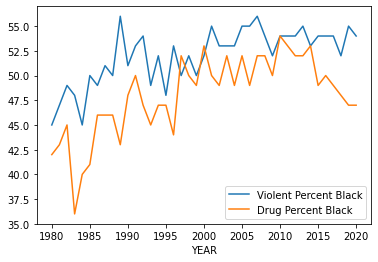

In [256]:
only_black.plot(legend=True)

In [250]:
import altair as alt

source = only_black

fig1 = alt.Chart(source).mark_point().encode(
    alt.X('YEAR', type = 'quantitative'),
    alt.Y('Violent Percent Black', type = 'quantitative')
)


#fig2 = alt.Chart(source).mark_line().encode(
#    x= 'YEAR:T',
#    y= 'Drug_Percent_Black:Q',
#)


fig1.display()



alt.Chart(...)

---
### Exercise 8

Let’s look at look at trends in arrests over time. For example, is the proportion of arrests for drug use that are Californians of Color categories changing over time? (for non-Americans: “people of color” is a term for people who do not identify as White, and includes a range of identities, including Black, Hispanic, Asian, Middle Eastern, etc…)

Plot the proportion of drug arrestees that are White over time.

---
### Exercise 9

As you look at the results you just plotted, you should see that the share of arrestees who are White has been declining over time. Does that necessary imply that police have been shifting their attention away from White Californians and towards Californians of Color?

---
### Exercise 10

To address this, let’s merge in demographic data for California over time. Download this file with racial demographic breakdowns for the US. In the zipped folder you download, you will find both data and a codebook you’ll need to interpret your data.

---
### Exercise 11

pandas offers an interpolate method that will do this for you, but interpolate just doesn’t interpolations for one set of observations. In this case, however, we need to do our interpolations within each group, so you’ll have to figure out how to use interpolate with groupby. (Hint: this is probably a job for apply).

---
### Exercise 12

Now that we have the share of the population in each county that is White, and the share of drug arrestees who are White all in one dataset, we can look at how the ratio of these two numbers changes over time. Plot the trend, over time, in this ratio